In [34]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re
import mpld3

Используем плагин mpld3 для интерактивных tooltip'ов

In [51]:
mpld3.enable_notebook()

Считываем csv, знакомимся с данными

In [2]:
df = pd.read_csv("hillary-clinton-emails/Emails.csv")

In [3]:
df.columns

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

Нас интересует колонка RawText. В ней очень много мусора + есть ошибки из-за того, что это отсканеные с pdf емейлы. Сначала вырежем всю дополнительную информацию, которая шла вместе с емейлами -- UNCLASSIFIED ..., RELEASE IN PART, CONFIDENTIAL и прочее. После этого вырежем дополнительные поля емейлов -- CC, FW, FROM, TO, SENT.

In [4]:
def parse(text):
    text = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff]', '', text)
    text = re.sub(r"STATE-\w+", "", text)
    text = re.sub(r"UNCLAS.*?NO FOIA WAIVER\.", "", text, flags=re.S)
    text = re.sub(r"^UNCLASSIFIED.*$", "", text, flags=re.M)
    text = re.sub(r"^PART \w+$", "", text, flags=re.M)
    text = re.sub(r"^RELEASE IN\s{0,1}\w*$", "", text, flags=re.M)
    text = re.sub(r"^RELEASE IN PART\s{0,1}\w*$", "", text, flags=re.M)
    text = re.sub(r"^From.*$", "", text, flags=re.M)
    text = re.sub(r"^Sent.*$", "", text, flags=re.M)
    text = re.sub(r"^To.*$", "", text, flags=re.M)
    text = re.sub(r"^Cc.*$", "", text, flags=re.M)
    text = re.sub(r"^Subject.*$", "", text, flags=re.M)
    text = re.sub(r"^B\d{1}$", "", text, flags=re.M)
    text = re.sub(r"^[-—]*\s{0,1}Original Message\s{0,1}[-—]*$", "", text, flags=re.M)
    text = re.sub(r"^CONFIDENTIAL$", "", text, flags=re.M)
    text = re.sub(r"^For.*$", "", text, flags=re.M)
    text = re.sub(r"^Fw.*$", "", text, flags=re.M)
    text = re.sub(r"^.*SENSITIVE BUT UNCLASSIFIED.*$", "", text, flags=re.M)
    text = re.sub(r"^Importance.*$", "", text, flags=re.M)
    return "\n".join(re.split(r"\n*", text)).strip()

Проверяем, как работает.

In [5]:
orig_text = df["RawText"][5000]
print(parse(orig_text))

nansmosmagennoranzassuser
NIEMISXMIZINOWNISIIIIMOVISME.1116,
sbwhoeop
Saturday, January 23, 2010 9:26 AM
H: FYI: Any foreign nation or leader with a front company becomes a "person" under US
law. S
http://coloradoindependent.com/46462/hugo-chavezs-state-owned-petroleos-corp-set-to-spend-on-your-u-s-election
F
&.1
3.1 4.1)
sr—c"
....e.-swadursooarssustre.tammzionewsmsostor,extuurs-xuAtias.
to .send on your
(in- mined Paerr-lee-- Corn
10101W1194901.1.1.11211...T.M.17,..
. aflgrnit,cnZfl,,,Z010
ti 4
491. 2 sea, r,%
(1,.A
'62 39 • M `4.1P, ‘s.3,Az-Ad:3'4
2:=111
.
. .1”....AILIONIMINSUlt S=WIMOlt.11111111111 2111011=1.19.711
,111221.VOMISSGMAIM1.1.7.1.111M.MVO.Itr...421/1.97.71r.11,111012.1.0
1:4;43y John Tornasic 1/22/10 3:58 PM
Blogging on the Citizens United Supreme Court ruling is more of what we love about the web. It's the kind of typical
collective dissection we have now come to expect but that never really existed before: serious, speculative, arcane, funny,
brilliant, baked, etc. T

/Users/astepanov/.virtualenvs/tf/lib/python3.5/re.py:203: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


Обработаем все документы.

In [6]:
%%time
parsed_text = []
for text in df["RawText"]:
    parsed_text.append(parse(text))

/Users/astepanov/.virtualenvs/tf/lib/python3.5/re.py:203: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


CPU times: user 5.25 s, sys: 26 ms, total: 5.27 s
Wall time: 5.32 s


Выведем список часто встречающихся биграм.

In [7]:
bigram_counts = defaultdict(int)

In [8]:
for document in parsed_text:
    for line in document.splitlines():
        words = line.split()
        for pair in zip(words, words[1:]):
            bigram_counts[" ".join(pair)] += 1

In [9]:
sorted(list(bigram_counts.items()), key=lambda item: -item[1])[:50]

[('of the', 13105),
 ('in the', 8813),
 ('to the', 6080),
 ('on the', 4592),
 ('and the', 3914),
 ('for the', 3749),
 ('that the', 3415),
 ('with the', 2988),
 ('to be', 2904),
 ('at the', 2453),
 ('will be', 2281),
 ('by the', 2221),
 ('is a', 2050),
 ('from the', 1991),
 ('of a', 1790),
 ('as a', 1694),
 ('has been', 1648),
 ('the United', 1637),
 ('in a', 1596),
 ('is the', 1398),
 ('United States', 1380),
 ('would be', 1364),
 ('for a', 1349),
 ('it is', 1254),
 ('want to', 1213),
 ('as the', 1206),
 ('have been', 1184),
 ('about the', 1152),
 ('the U.S.', 1134),
 ('of State', 1068),
 ('to a', 1067),
 ('that he', 995),
 ('to do', 993),
 ('is not', 986),
 ('I have', 979),
 ('I am', 967),
 ('have a', 931),
 ('State Department', 925),
 ('and a', 902),
 ('need to', 895),
 ('over the', 888),
 ('we are', 880),
 ('with a', 870),
 ('going to', 860),
 ('we have', 857),
 ('I will', 854),
 ('to get', 851),
 ('to have', 815),
 ('was a', 814),
 ('of this', 811)]

Самая часто встречающаяся -- of the, что вполне логично. Теперь выведем список биграм с частотой > 200 с максимальным Pointwise Mutual Information. Ограничение на частоту требуется, чтобы в список не попали уж совсем редкие биграмы.

In [11]:
import nltk
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()
text = " ".join(map(lambda x: " ".join(x.splitlines()), parsed_text))
#text = re.sub(r"[^a-zA-Z]*", "", text)
finder = BigramCollocationFinder.from_words(text.split())
finder.apply_freq_filter(200)
finder.nbest(bigram_measures.pmi, 30) 

[('Private', 'Residence'),
 ('SECRETARY', 'CLINTON:'),
 ('*En', 'route'),
 ('RELEASE', 'IN'),
 ('IN', 'PART'),
 ('Mills,', 'Cheryl'),
 ('Conference', 'Room'),
 ('Middle', 'East'),
 ('Washington,', 'DC'),
 ('Cheryl', 'D'),
 ('human', 'rights'),
 ('New', 'York'),
 ('health', 'care'),
 ('Prime', 'Minister'),
 ('White', 'House'),
 ("Secretary's", 'Office'),
 ('United', 'States'),
 ('United', 'Nations'),
 ('Let', 'me'),
 ('rather', 'than'),
 ('pm', 'DEPART'),
 ('pm', 'ARRIVE'),
 ('Hillary', 'Clinton'),
 ('foreign', 'policy'),
 ('State', 'Department'),
 ('pm', "Secretary's"),
 ('make', 'sure'),
 ('let', 'me'),
 ('national', 'security'),
 ('This', 'email')]

Private residence, en route, conference room, human rights, washington dc. В принципе в списке довольно много биграм, слова в которых часто встречаются вместе, а по отедельности не так часто. Так и должно быть, ведь метрика -- mutual information.

Проведем KMeans кластеризацию. Наилучшие результаты показали следующие параметры: n_clusters=3, max_feauters=2000

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
vectorizer = TfidfVectorizer(max_features=2000)
data = vectorizer.fit_transform(parsed_text)

In [15]:
from sklearn.cluster import KMeans

In [16]:
%%time
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

CPU times: user 1min 26s, sys: 745 ms, total: 1min 27s
Wall time: 1min 30s


In [17]:
y = kmeans.predict(data)

In [18]:
parsed_text = np.array(parsed_text)

In [ ]:
Сначала просто выведем несколько примеров из каждого кластера

In [84]:
for cluster in range(3):
    for ex in range(3):
        print(parsed_text[y == cluster][ex])
        print("-------")
    print("-------")

What a wonderful, strong and moving statement by your boss. please tell her how much Sen. McCain appreciated it. Me
too
-------
Thx
as our soldiers do. Thinking of you and Pat and everyone this morning.
AM
-------
FYI -
Shea, Peter T
All,
ADS
Aaron D. Snipe
Spokesperson I Bureau of Near Eastern Affairs I U.S. Department of State
 
Office: +1 202-647-9533 I Email: snipead@state.gov
cc: Mitchell, Andrew B
-------
-------
_ .....
Including mine. Her remarks were really moving. Chriswas an amazing man. Such a huge loss. You know, I was in Libya
before coming here and in my almost ten years, I have never worked with such a calm, cool headed, funny
diplomat. Made it all seem really easy- even in one of the hardest places to work in the world.
Thx
, Sullivan, Jacob .1
This is from the spokesperson in NEA. It's true.
Please tell the Secretary how much her words meant to us down here. The statement was amazing and the delivery was
so heartfelt and genuine.
We're really blown away.
Please thank 

Похоже, что в первый кластер попали короткие ответы, во второй средние, а в 3 кластер длтинные рассуждения про Ливию и Каддафи.

Визуализируем с помощью TSNE и mpld3

In [25]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_tsne = tsne.fit_transform(data.todense())

In [28]:
import matplotlib.pyplot as plt

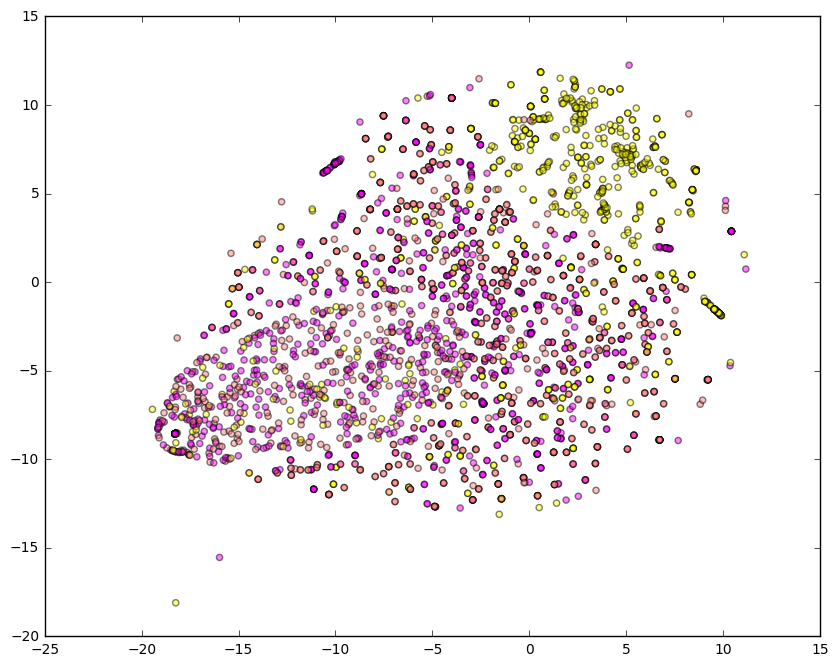

In [90]:
color = np.linspace(0.0, 1, 3)
fig, ax = plt.subplots(figsize=(10, 8))
scat = ax.scatter(X_tsne[:3000, 0], X_tsne[:3000, 1], c=color[y][:3000], cmap=plt.cm.spring, alpha=0.5)
tooltip = mpld3.plugins.PointLabelTooltip(scat, labels=list(map(str, y[:3000])))
mpld3.plugins.connect(fig, tooltip)
plt.show()

С помощью tooltip'ов можно посмотреть, к какому кластеру принадлежит точка. Так же картину сверху можно зумить с помощью контролов снизу.

Основная проблема работы с асессорами -- их нужно обучать каждому виду деятельности и деятельность должна быть формализуема. Поэтому простановка тем для сообщений кажется непосильно задачей для асессоров, и нужно скорее просить их сравнить, об одной и той же теме эти два письма или нет. В этом случае нормированная сумма $\sum{i, j}I(y_i == y_j)I(\text{асессор утверждает, что i и j из одной темы})$ может служить оценкой качества модели -- чем больше она близка к единице, тем ближе качетсво модели к решениям асессоров. Но нужно понимать, что оценка одного асессора может быть не статзначима. Каждую пару текстов можно попробовать давать нескольким асессорам, в этом случае нужно заменить индикатор на долю асессоров, которая утверждает, что i и j из одной темы.